### وارد کردن کتابخانه‌ها

در این سلول، کتابخانه‌های `numpy`، `opencv` و `matplotlib.pyplot` برای پردازش تصویر و رسم نمودار وارد می‌شوند.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### بارگذاری تصویر اصلی

تصویر اصلی به صورت خاکستری (grayscale) از مسیر مشخص شده بارگذاری می‌شود.

In [2]:
# Load the original grayscale image
original_image = cv.imread('../src/neuron.jpg', 0)

### ایجاد ماسک باینری با استفاده از آستانه‌گذاری

یک ماسک باینری از تصویر اصلی با استفاده از آستانه‌گذاری ساده ایجاد می‌شود. پیکسل‌هایی که مقدارشان بالاتر از `70` باشد به `255` و بقیه به `0` تبدیل می‌شوند.

In [3]:
# Apply a binary threshold to the image to create a mask
_, binary_mask = cv.threshold(original_image, 70, 255, cv.THRESH_BINARY)

### تعریف هسته (kernel) برای عملیات‌های مورفولوژیکی

یک هسته مربعی ۸ x۸ برای استفاده در عملیات‌های مورفولوژیکی ایجاد می‌شود.

In [4]:
# Define a square kernel for morphological operations
kernel = np.ones((8, 8), np.uint8)

### ایجاد ماسک فرسایش‌یافته (Eroded Mask)

با اعمال عملیات فرسایش (`erosion`) روی ماسک باینری، ماسک فرسایش‌یافته ایجاد می‌شود که جزئیات کوچک را حذف می‌کند.

In [5]:
# Erode the binary mask to remove small details
eroded_mask = cv.erode(binary_mask, kernel, iterations=1)

### ایجاد ماسک گسترش‌یافته (Dilated Mask)

عملیات گسترش (`dilation`) روی ماسک باینری اعمال می‌شود تا سوراخ‌ها یا جزئیات کوچک پر شوند.

In [6]:
# Dilate the binary mask to fill in small holes
dilated_mask = cv.dilate(binary_mask, kernel, iterations=1)

### ایجاد ماسک بسته‌شده (Closing Mask)

عملیات `closing` برای پر کردن سوراخ‌های کوچک داخل اشیاء سفید اعمال می‌شود.

In [7]:
# Apply a closing operation to the binary mask to fill in small holes
closed_mask = cv.morphologyEx(binary_mask, cv.MORPH_CLOSE, kernel)

### ایجاد ماسک بازشده (Opening Mask)

عملیات `opening` روی ماسک باینری اعمال می‌شود که باعث حذف نویزهای کوچک و جزئیات ناخواسته می‌شود.

In [8]:
# Apply an opening operation to the binary mask to remove small details
opened_mask = cv.morphologyEx(binary_mask, cv.MORPH_OPEN, kernel)

### ایجاد ماسک گرادیان (Gradient Mask)

عملیات `gradient` لبه‌های اشیاء را برجسته می‌کند و تفاوت بین `dilation` و `erosion` را نمایش می‌دهد.

In [9]:
# Apply a gradient operation to the binary mask to highlight the edges
gradient_mask = cv.morphologyEx(binary_mask, cv.MORPH_GRADIENT, kernel)

### نمایش تصاویر با استفاده از ساب‌پلات‌ها

در این سلول، تمامی ماسک‌ها در کنار تصویر اصلی با استفاده از یک شبکه‌ی ۴ x۲ به صورت زیربخش‌های جداگانه نمایش داده می‌شوند. هر زیربخش (subplot) دارای عنوان مشخص برای تصویر مربوطه است و در پایان همه تصاویر در کنار هم نمایش داده می‌شوند.

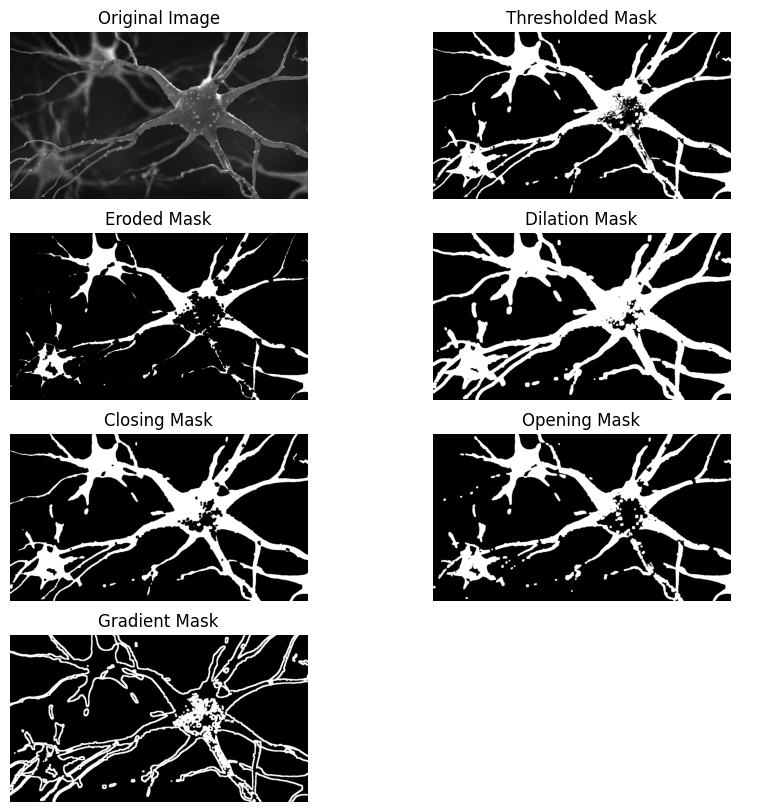

In [10]:
# Create a grid of subplots to display the various mask results
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = axes.flatten()

# Display the original image in the first subplot
ax1.axis('off')
ax1.set_title('Original Image')
ax1.imshow(cv.cvtColor(original_image, cv.COLOR_GRAY2RGB))

# Display the binary mask in the second subplot
ax2.axis('off')
ax2.set_title('Thresholded Mask')
ax2.imshow(binary_mask, cmap='gray')

# Display the eroded mask in the third subplot
ax3.axis('off')
ax3.set_title('Eroded Mask')
ax3.imshow(eroded_mask, cmap='gray')

# Display the dilated mask in the fourth subplot
ax4.axis('off')
ax4.set_title('Dilation Mask')
ax4.imshow(dilated_mask, cmap='gray')

# Display the closed mask in the fifth subplot
ax5.axis('off')
ax5.set_title('Closing Mask')
ax5.imshow(closed_mask, cmap='gray')

# Display the opened mask in the sixth subplot
ax6.axis('off')
ax6.set_title('Opening Mask')
ax6.imshow(opened_mask, cmap='gray')

# Display the gradient mask in the seventh subplot
ax7.axis('off')
ax7.set_title('Gradient Mask')
ax7.imshow(gradient_mask, cmap='gray')

# Display an empty subplot in the eighth position
ax8.axis('off')
ax8.set_title('')

# Show the plot
plt.show()